<a href="https://colab.research.google.com/github/hopefulhazel/programacion/blob/master/minst1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the digits

In [1]:
print('try')

try


In [2]:
!pip install -q keras

import keras


Using TensorFlow backend.


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function



import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import plot_model

@property
def layers(self):
    # Historically, `sequential.layers` only returns layers that were added
    # via `add`, and omits the auto-generated `InputLayer`
    # that comes at the bottom of the stack.
    if self._layers and isinstance(self._layers[0], InputLayer):
        return self._layers[1:]
    return self._layers

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

count the number of unique train labels

In [5]:
unique, counts = np.unique(y_train, return_counts = True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


count the number of unique test labels

In [6]:
unique, counts = np.unique(y_test, return_counts = True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [0]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

choose a 5x5= 25 random numbers/digits from the list

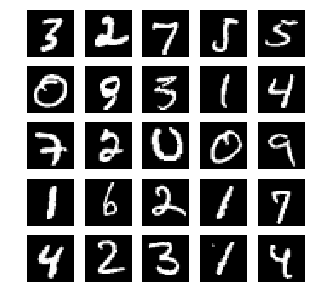

In [8]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5, i+1)
    image = images[i]
    plt.imshow(image, cmap= 'gray')
    plt.axis('off')
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

# Classifying the digits

*MLP fully connected network*

In [0]:
num_labels = len(np.unique(y_train))

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [0]:
image_size = x_train.shape[1]

resize and normalize


In [0]:
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


network parameters

In [0]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

In [14]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())

W0625 09:41:49.605022 139648617109376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 09:41:49.623029 139648617109376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 09:41:49.625915 139648617109376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 09:41:49.642493 139648617109376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [15]:
model.add(Dropout(dropout))

W0625 09:41:49.679953 139648617109376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0625 09:41:49.693662 139648617109376 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


W0625 09:41:49.731720 139648617109376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 09:41:49.753728 139648617109376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 576)               0         
__________

In [0]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [18]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


W0625 09:41:49.965997 139648617109376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2572 - acc: 0.9218
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0656 - acc: 0.9796
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0454 - acc: 0.9865
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0357 - acc: 0.9885
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0299 - acc: 0.9903
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0262 - acc: 0.9913
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0222 - acc: 0.9929
Epoch 8/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0207 - acc: 0.9932
Epoch 9/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0174 - acc: 0.9939
Epoch 10/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0158 - acc: 0.994

***Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.***

***batch size parameter: is the sample size of the number of inputs to process at each training step ***


loss: we want to minimize it. if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output


accuracy: is the percent of correct predictions based on ground truth

In [19]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

10000/10000 [==============================] - 0s 26us/step
